Import Required Libraries

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


Load Dataset & Create Labels

In [2]:
data = []
labels = []

dataset_path = "Driver Drowsiness Dataset (DDD)"

img_size = 64

for category in ["Drowsy", "Non Drowsy"]:
    folder_path = os.path.join(dataset_path, category)
    label = 0 if category == "Drowsy" else 1

    for img in os.listdir(folder_path):
        try:
            img_path = os.path.join(folder_path, img)
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (img_size, img_size))
            data.append(image)
            labels.append(label)
        except:
            pass


Preprocessing

In [3]:
data = np.array(data).reshape(-1, img_size, img_size, 1)
labels = np.array(labels)

data = data / 255.0
labels = to_categorical(labels, 2)

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


Training samples: (33434, 64, 64, 1)
Testing samples: (8359, 64, 64, 1)


Build CNN Model

In [4]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(64,64,1)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


c:\Users\jabba\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,624,834 (6.20 MB)

 Trainable params: 1,624,834 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [5]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 1479s 1s/step - accuracy: 0.9602 - loss: 0.0898 - val_accuracy: 0.9989 - val_loss: 0.0055
Epoch 2/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 83s 79ms/step - accuracy: 0.9975 - loss: 0.0090 - val_accuracy: 0.9983 - val_loss: 0.0047
Epoch 3/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 64s 61ms/step - accuracy: 0.9979 - loss: 0.0073 - val_accuracy: 0.9995 - val_loss: 0.0019
Epoch 4/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 64s 61ms/step - accuracy: 0.9980 - loss: 0.0061 - val_accuracy: 0.9962 - val_loss: 0.0121
Epoch 5/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 67s 64ms/step - accuracy: 0.9979 - loss: 0.0060 - val_accuracy: 0.9994 - val_loss: 0.0021
Epoch 6/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 64s 61ms/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9996 - val_loss: 0.0019
Epoch 7/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 61s 58ms/step - accuracy: 0.9992 - loss: 0.0031 - val_accuracy: 0.9998 - val_loss: 0.0013
Epoch 8/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 65s 62ms/step - accuracy: 0.9993 -

Evaluate Model

In [6]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy * 100)


262/262 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9996 - loss: 0.0022
Test Accuracy: 99.96411204338074


Plot Accuracy & Loss (IMPORTANT for PPT)

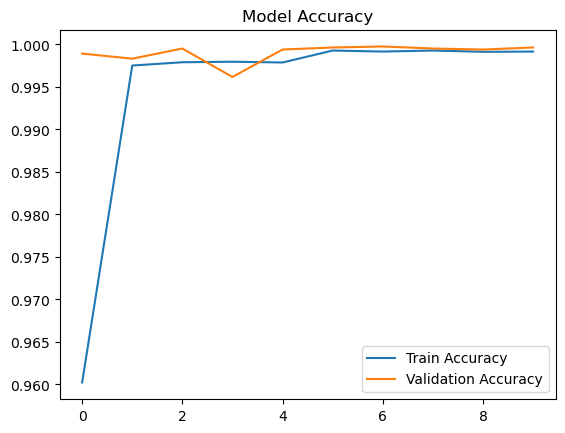

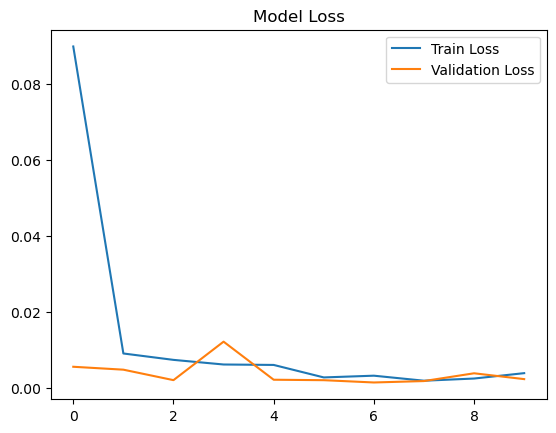

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()


Save Model

In [10]:
model.save("driver_drowsiness_model.h5")
print("Model saved successfully!")


Model saved successfully!
